### Loading Libraries

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import cm
from mpl_toolkits.axes_grid1 import ImageGrid
import math
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###

In [3]:
batch_size=32
datagen_args = dict(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
                   rescale=1./255)
datagen = ImageDataGenerator(**datagen_args)
datagenerator = datagen.flow_from_directory('/content/drive/MyDrive/DataGenerator/cats_dogs_small/train',target_size=(64,64), # Upload files
                                            batch_size=batch_size,interpolation="lanczos",shuffle=True)

Found 2000 images belonging to 2 classes.


In [4]:
print("number of images", datagenerator.samples)
print("number of class", len(datagenerator.class_indices))
print("number of images in the classes", datagenerator.samples / len(datagenerator.class_indices))

number of images 2000
number of class 2
number of images in the classes 1000.0


In [5]:
print(datagenerator.class_indices)

{'cats': 0, 'dogs': 1}


In [6]:
datagenerator.filenames[0:5]

['cats/cat.0.jpg',
 'cats/cat.1.jpg',
 'cats/cat.10.jpg',
 'cats/cat.100.jpg',
 'cats/cat.101.jpg']

In [7]:
x, y = next(datagenerator)
print("x", type(x))
print("y", type(y))
print("x", x.shape)
print("y", y.shape)

x <class 'numpy.ndarray'>
y <class 'numpy.ndarray'>
x (32, 64, 64, 3)
y (32, 2)


In [8]:
def show_grid(image_list,nrows,ncols,label_list=None,show_labels=False,savename=None,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,
                     nrows_ncols=(nrows, ncols),
                     axes_pad=0.3,
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')
        ax.axis('off')
        if show_labels:
            ax.set_title(class_mapping[y_int[i]])
    if savename != None:
        plt.savefig(savename,bbox_inches='tight')

In [9]:
#y_int = np.argmax(y,axis=-1)
y_int = []
for i in range(len(y)):
  y_int.append(y[i][1].astype(int))
class_mapping = ['dog', 'cat']

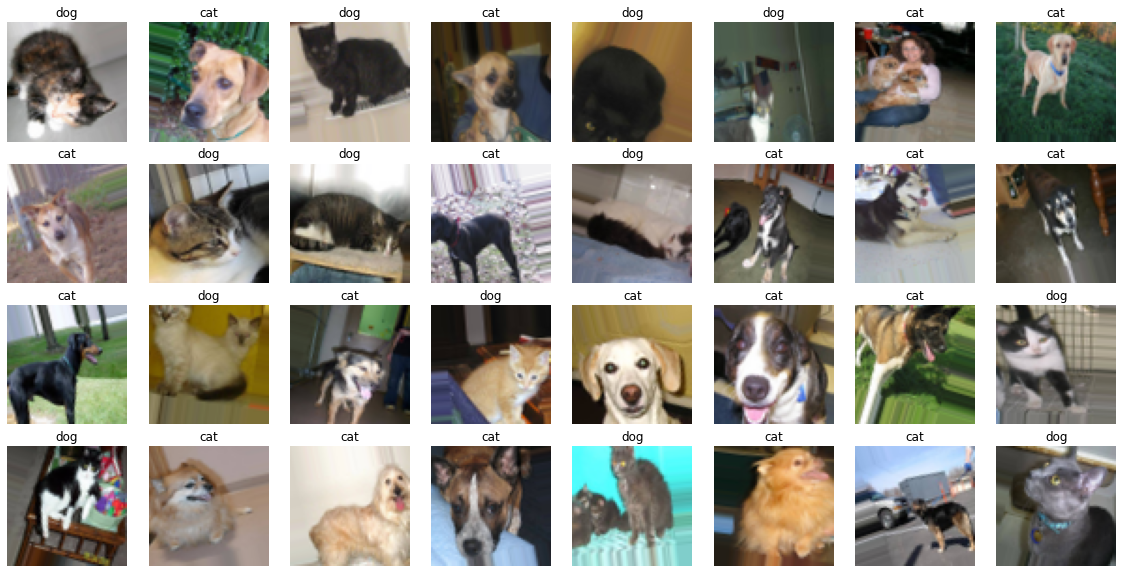

In [10]:
show_grid(x, 4, 8, label_list=y_int, show_labels=True, figsize=(20,10), savename='/content/drive/MyDrive/DataGenerator/image_grid.png')

Found 2000 images belonging to 2 classes.


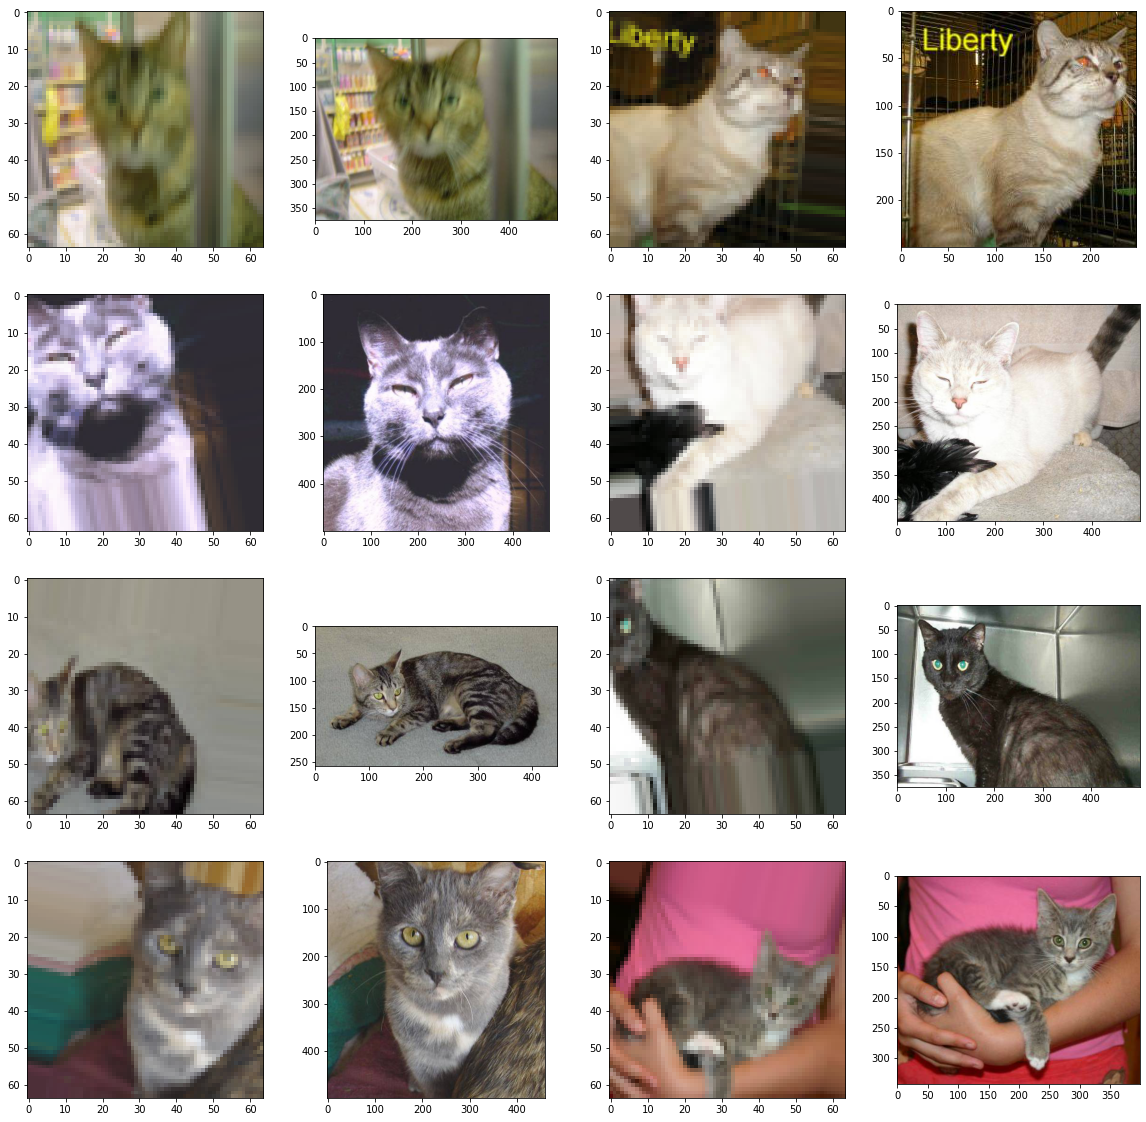

In [12]:
#Shuffle has been set to False
dgen_no_shuffle = datagen.flow_from_directory('/content/drive/MyDrive/DataGenerator/cats_dogs_small/train',target_size=(64,64),batch_size=32,interpolation="lanczos",shuffle=False)
 
# We get the third batch
dgen_no_shuffle.reset() #resets the generator to the first batch
for i in range(3):
    x1,y1 = next(dgen_no_shuffle)
    y1_int = np.argmax(y1,axis=-1)
 
#Plot the batch images w.r.t. the dataset images.
plt.figure(figsize=(20,20))
idx=1
for i in range(8):
    plt.subplot(4,4,idx)
    idx+=1
    plt.imshow(x1[i].reshape(64,64,3))
    plt.subplot(4,4,idx)
    plt.imshow(io.imread(os.path.join(dgen_no_shuffle.directory,dgen_no_shuffle.filenames[(dgen_no_shuffle.batch_index-1)*32+i])))
    idx+=1
plt.savefig('/content/drive/MyDrive/DataGenerator/visual_original_comp.png',bbox_inches='tight')

In [13]:
import keras

In [14]:
validation_generator = datagen.flow_from_directory('/content/drive/MyDrive/DataGenerator/cats_dogs_small/validation',target_size=(64,64),
                                            batch_size=batch_size,interpolation="lanczos",shuffle=True)

Found 1010 images belonging to 2 classes.


In [15]:
print(validation_generator.class_indices)
x_v, y_v = next(validation_generator)
print("x", type(x_v))
print("y", type(y_v))
print("x", x_v.shape)
print("y", y_v.shape)

{'cats': 0, 'dogs': 1}
x <class 'numpy.ndarray'>
y <class 'numpy.ndarray'>
x (32, 64, 64, 3)
y (32, 2)
